С помощью точек, у которых есть координаты, мы можем создать карту, которая будет отображать широту по оси х, а долготу по у

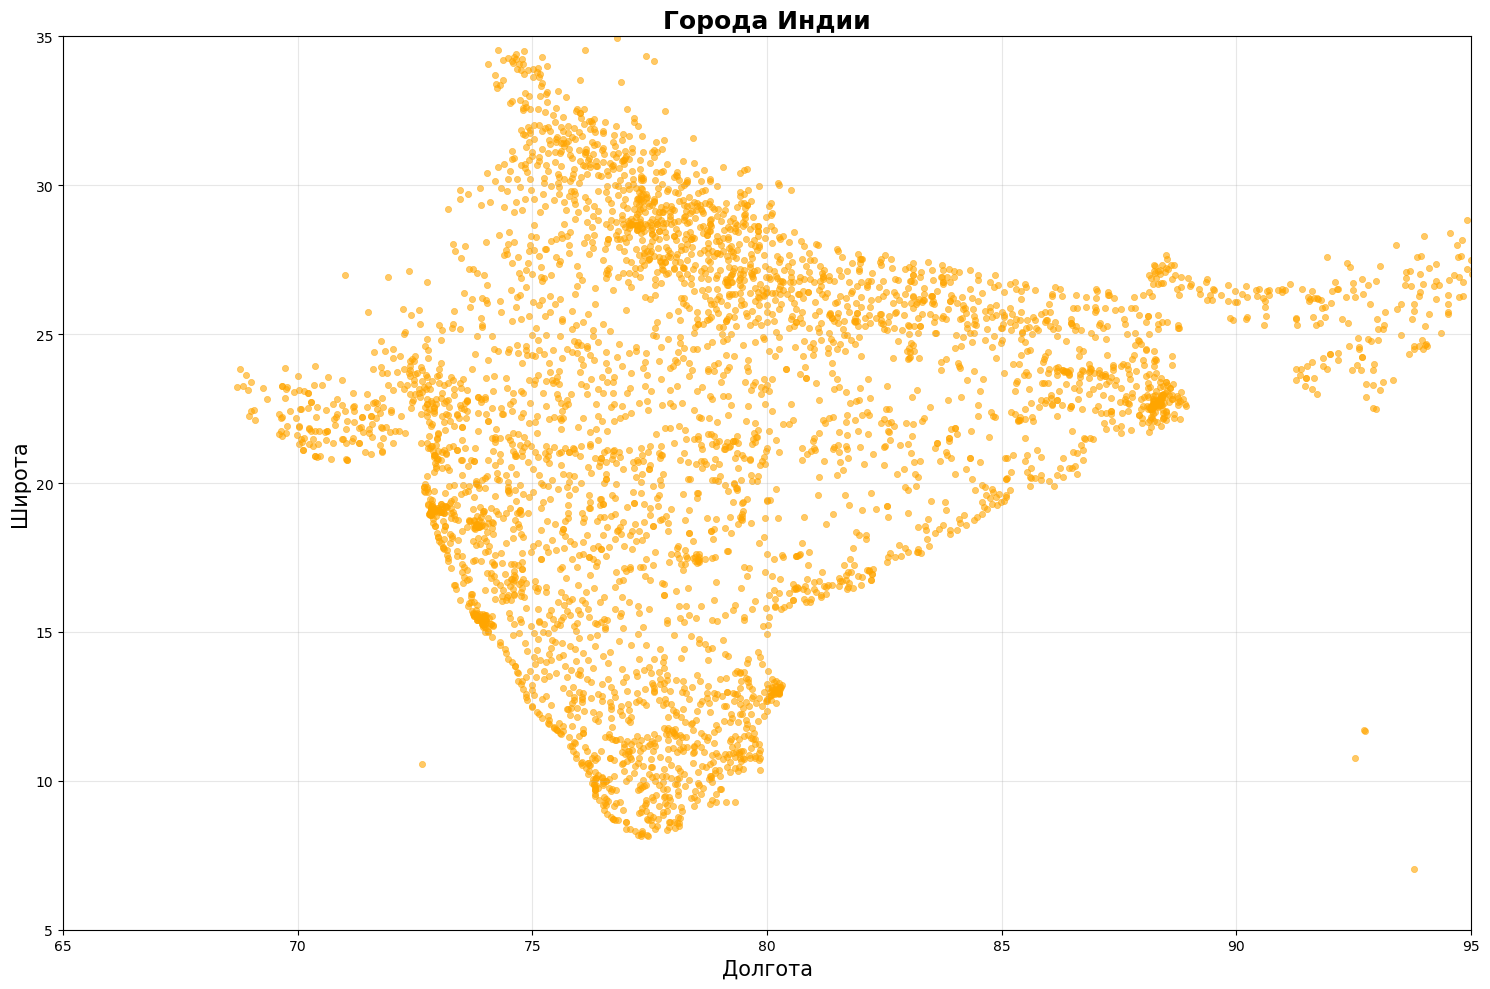


 Статистика:
Всего городов: 4231
Штатов: 58
Географический охват:
  Широта: 7.03° - 34.93°
  Долгота: 68.72° - 96.83°


In [35]:
# Добавление карты
plt.figure(figsize=(15, 10))

# Добавление точек
plt.scatter(
    df['Longitude'], 
    df['Latitude'],
    alpha=0.6,# Прозрачность
    s=20,# Размер
    color='orange',
    linewidth=0.5)

# Настройки графика
plt.title('Города Индии', fontsize=18, fontweight='bold')
plt.xlabel('Долгота', fontsize=15)
plt.ylabel('Широта', fontsize=15)
plt.grid(True, alpha=0.3)

# Границы
plt.xlim(65, 95)
plt.ylim(5, 35)

plt.tight_layout()
plt.show()

# Статистика
print(f"\n Статистика:")
print(f"Всего городов: {len(df)}")
print(f"Штатов: {df['State'].nunique()}")
print(f"Географический охват:")
print(f"  Широта: {df['Latitude'].min():.2f}° - {df['Latitude'].max():.2f}°")
print(f"  Долгота: {df['Longitude'].min():.2f}° - {df['Longitude'].max():.2f}°")

Дальше мы решили саздать очень( очень-очень) обобщенную климатическую карту. Зоны мы разделяли с помощью широт и долгот, поэтому результат максимально обобщен. Мы разделили 

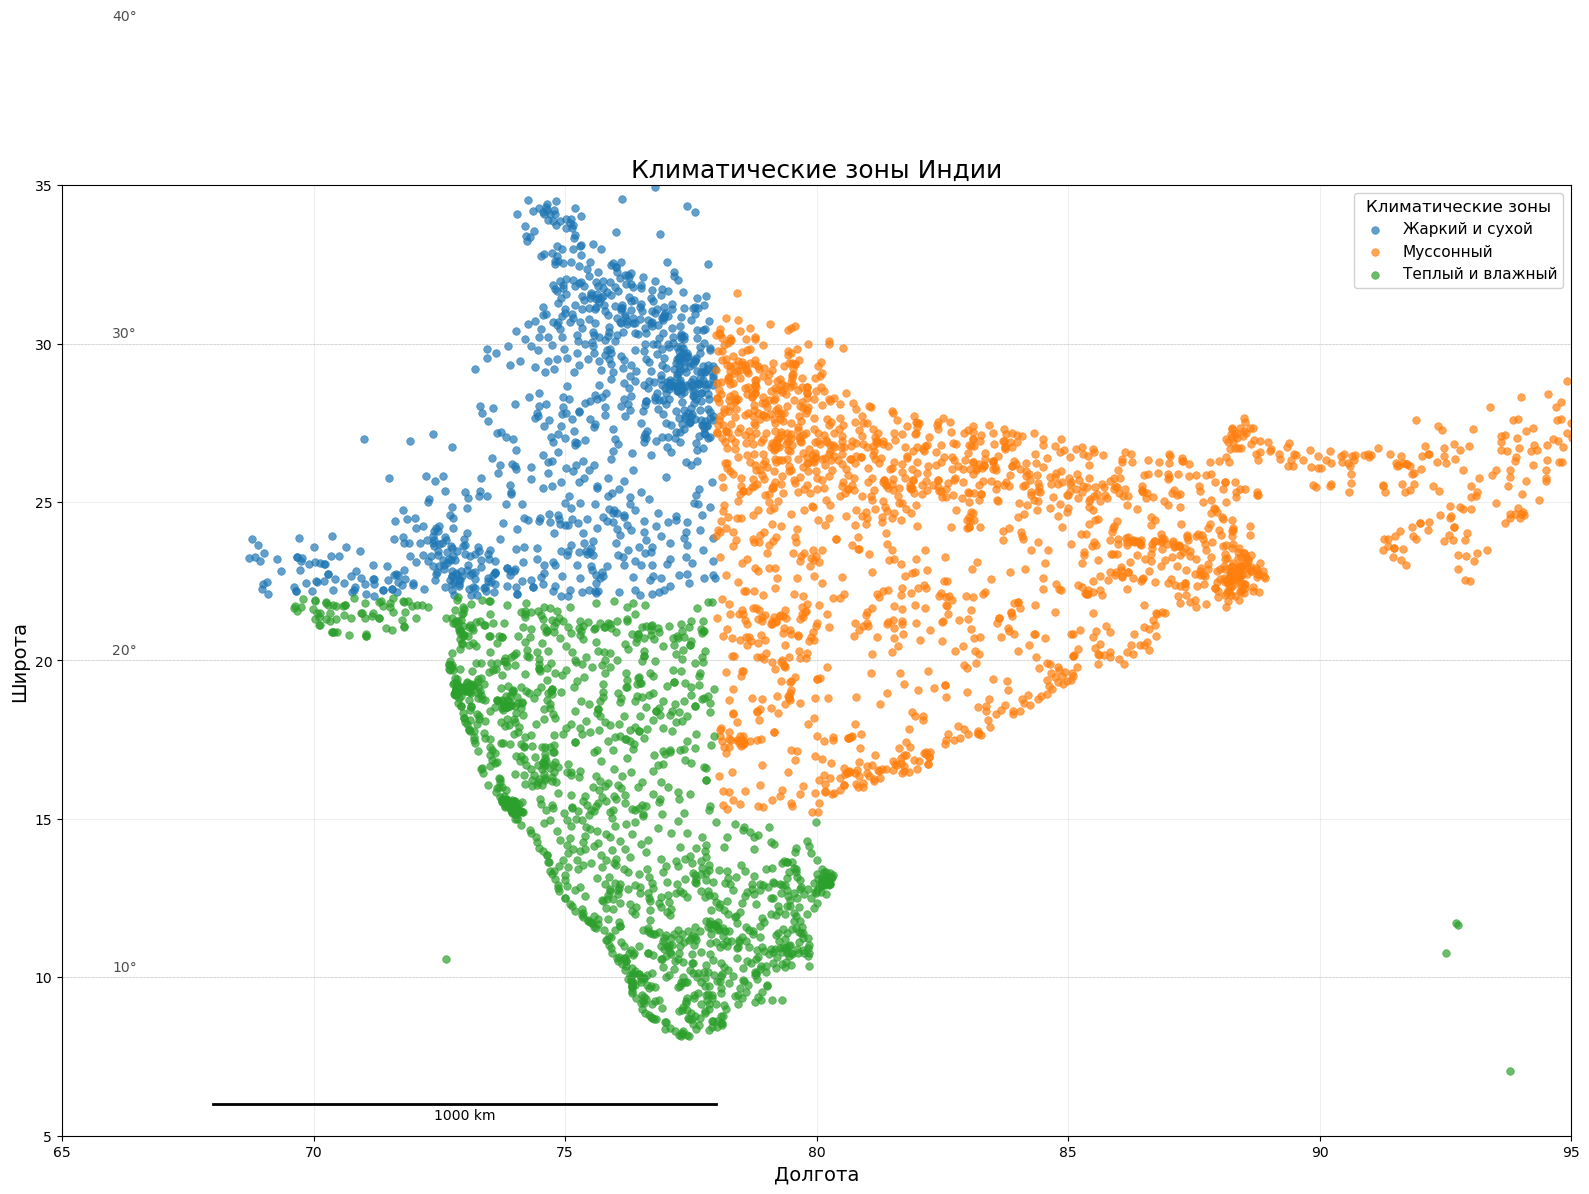

Распределение городов по климатическим зонам:
Муссонный: 1845 городов (43.6%)
Теплый и влажный: 1454 городов (34.4%)
Жаркий и сухой: 932 городов (22.0%)


In [37]:
# Функция для определения климатической зоны на основе координат
def get_climate_zone(lat, lon):
    # Определение климатической зоны по широте
    if lon < 78 and lat > 22:
        return 'Жаркий и сухой' # Северо-западная Индия
    elif lon >= 78 and lat > 15:
        return 'Муссонный' #Центральная и восточная Индия
    else:
        return 'Теплый и влажный' # Южная Индия и прибрежные регионы

# Добавление климатической зоны и цветов
df['Climate_Zone'] = df.apply(lambda row: get_climate_zone(row['Latitude'], row['Longitude']), axis=1)

climate_colors = {
    'Жаркий и сухой': 'orange',
    'Муссонный': 'white',
    'Теплый и влажный': 'green'}

# Добавление карты
plt.figure(figsize=(16, 12))

# Добавление точек
for zone, color in climate_colors.items():
    zone_data = df[df['Climate_Zone'] == zone]
    plt.scatter(
        zone_data['Longitude'], 
        zone_data['Latitude'],
        alpha=0.7,
        s=30,
        linewidth=0.5,
        label=zone)

# Настройки графика
plt.title('Климатические зоны Индии', fontsize=18)
plt.xlabel('Долгота', fontsize=14)
plt.ylabel('Широта', fontsize=14)
plt.grid(True, alpha=0.2)

# Добавление границ
plt.xlim(65, 95)
plt.ylim(5, 35)

# Добавление широт
lat_lines = [10, 20, 30, 40]
for lat_line in lat_lines:
    plt.axhline(y=lat_line, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
    plt.text(66, lat_line + 0.2, f'{lat_line}°', fontsize=10, alpha=0.7)

# Добавление легенды
plt.legend(title='Климатические зоны', title_fontsize=12, fontsize=11, 
           loc='upper right', framealpha=0.9)

# Добавление масштаба
plt.plot([68, 78], [6, 6], color='black', linewidth=2)  # Линия масштаба
plt.text(73, 5.5, '1000 km', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Статистика
print("Распределение городов по климатическим зонам:")
zone_counts = df['Climate_Zone'].value_counts()
for zone, count in zone_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{zone}: {count} городов ({percentage:.1f}%)")

Дальше мы создадим карту, на которой будут отображены лишь 5 штатов с максимальным количеством городов.

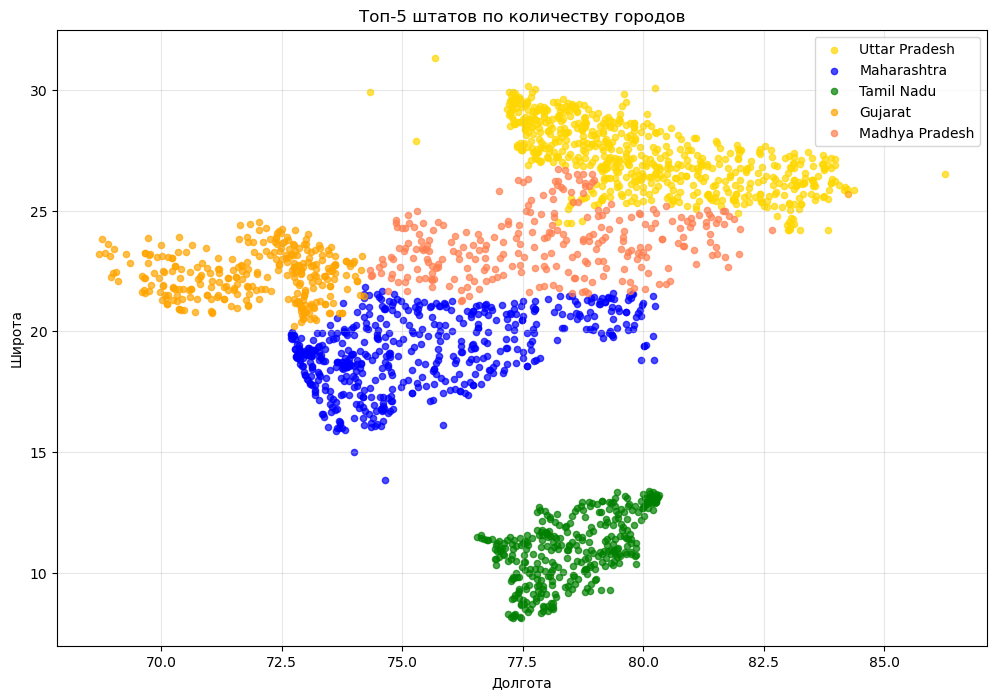

In [39]:
top_states = df['State'].value_counts().head(5).index.tolist()

# Создаем цвета для каждого штата
colors = ['gold', 'blue', 'green', 'orange', 'coral']

plt.figure(figsize=(12, 8))

for i, state in enumerate(top_states):
    state_data = df[df['State'] == state]
    plt.scatter(state_data['Longitude'], state_data['Latitude'],
               color=colors[i], label=state, alpha=0.7, s=20)

plt.legend()
plt.title('Топ-5 штатов по количеству городов')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True, alpha=0.3)
plt.show()

Здесь мы выведем топ 15 штатов по количеству городов

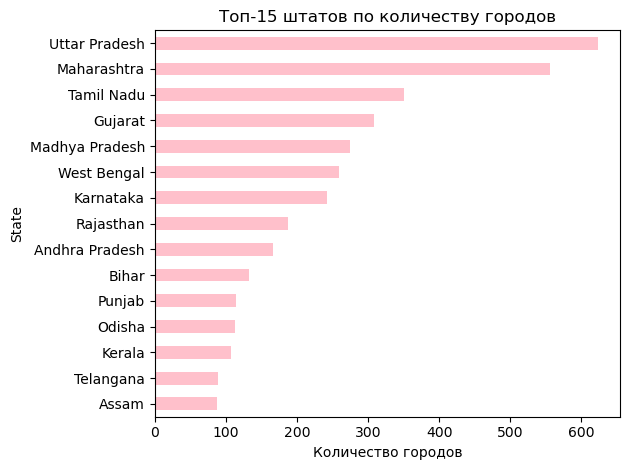

In [34]:
state_stats.plot(kind='barh', color='pink')
plt.title('Топ-15 штатов по количеству городов')
plt.xlabel('Количество городов')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Географический центр каждого штата
state_centers = df.groupby('State').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Location': 'count'
}).rename(columns={'Location': 'City_Count'})